<a href="https://colab.research.google.com/github/Tydos/Interpretable-ML-Models/blob/main/Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

This notebook implements linear regression using the popular diabetes dataset used for regression

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [7]:
X = load_diabetes().data
y = load_diabetes().target
cols = load_diabetes().feature_names

print(X[1],y[1],cols)

[-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06833155 -0.09220405] 75.0 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(len(X_train))
print(len(X_test))

353
89


We have to predict y = w*x+b

10 features -> 10 weights, 10 biases

### Closed form solution

Closed-form solutions are best suited for problems with a small number of features. The dominant computational cost comes from inverting the feature covariance matrix, which has o(n^3) complexity in the number of features and therefore does not scale well to high-dimensional datasets.

In [9]:
#closed form solution - this one passes through origin
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def normal_bias_equation(X,y):
  #add bias using numpy column concat function
  len_features = X.shape[0]
  bias = np.ones((len_features,1)) #create matrix of size 1*n
  X_b = np.c_[bias,X]

  theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
  return theta

def lstsq_normal(X,y):
  len_features = X.shape[0]
  bias = np.ones((len_features,1)) #create matrix of size 1*n
  X_b = np.c_[bias,X]

  return np.linalg.lstsq(X_b,y,rcond=None)


In [10]:
w = normal_equation(X_train,y_train)
for i, col in enumerate(cols):
  print(f"{col}: {w[i]}")

age: -84.92723310565857
sex: -253.00610124315187
bmi: 390.81604481826514
bp: 311.2406103085248
s1: 262.63473637573446
s2: -301.0950430206047
s3: -354.51542383521183
s4: 116.86675311028564
s5: 113.27385272268825
s6: 212.58028499875954


In [11]:
w = normal_bias_equation(X_train,y_train)
print(w)
for i, col in enumerate(cols):
  print(f"{col}: {w[i]}")


[ 152.44441465   23.2773466  -333.96627876  479.37924426  397.58588402
 -606.95504806  414.49816374  -56.21456761  116.44455814  585.25168739
  102.10467302]
age: 152.44441465263358
sex: 23.27734659862526
bmi: -333.96627875616514
bp: 479.37924425619667
s1: 397.58588402415216
s2: -606.9550480605171
s3: 414.4981637438151
s4: -56.21456760663049
s5: 116.44455813875835
s6: 585.2516873913502


In [12]:
w, residual, rank, s = lstsq_normal(X_train,y_train)
for i, col in enumerate(cols):
  print(f"{col}: {w[i]}")

print(residual)
print(rank)
print(s)


age: 152.4444146526324
sex: 23.277346598626423
bmi: -333.9662787561671
bp: 479.37924425619593
s1: 397.58588402415285
s2: -606.9550480605193
s3: 414.49816374381675
s4: -56.214567606633636
s5: 116.4445581387541
s6: 585.2516873913512
[940373.7308548]
11
[18.78855065  1.80906017  1.05914646  0.96581774  0.88778059  0.71806757
  0.7043779   0.6623594   0.55101842  0.25157629  0.08558866]


### Gradient descent solution


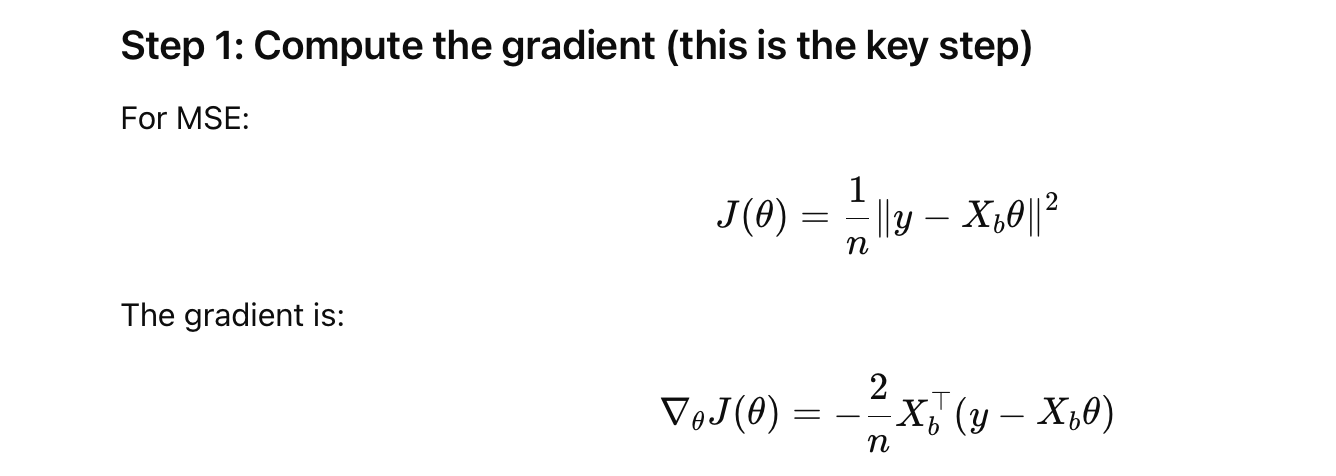

#### Bias

In [13]:
#TODO
def add_bias(X):
    n_samples = X.shape[0]
    return np.hstack((np.ones((n_samples, 1)), X))

X_b = add_bias(X_train)
print(X_b[0])

print(X_train.shape)
print(X_b.shape)
print(y_train.shape)
print(y_test.shape)

[ 1.          0.01628068 -0.04464164 -0.06332999 -0.05731319 -0.05798303
 -0.04891244  0.00814208 -0.03949338 -0.05947118 -0.06735141]
(353, 10)
(353, 11)
(353,)
(89,)


#### Mean Squared Error Loss

In [14]:
#create a weight vector so that i can do wTx
weight_vector = np.ones(X_b.shape[1])
print(weight_vector)

def mse_loss(X_b,y,w):
  Y_hat = X_b @ weight_vector
  return np.mean((y-Y_hat)**2)

loss = mse_loss(X_b,y_train,weight_vector)
print(weight_vector)
print(loss)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
27613.887394111825


#### Gradient Descent

w <- w - learning_rate*gradient

In [15]:
def gradient(X_b,y,w):
    n = len(y)
    return -(2 / n) * X_b.T @ (y - X_b @ w)

gradient(X_b,y_train,weight_vector)

array([-2.95371395e+02, -9.32573864e-01, -1.10979030e-01, -3.53528307e+00,
       -2.72261208e+00, -1.50004810e+00, -1.36365107e+00,  2.68550344e+00,
       -2.94367483e+00, -3.37813471e+00, -2.90694912e+00])

epoch - 0 : Loss -23466.700170305598
epoch - 1 : Loss -20106.700512266743
epoch - 2 : Loss -17384.32026335777
epoch - 3 : Loss -15178.409949146986
epoch - 4 : Loss -13390.839088162307
epoch - 5 : Loss -11942.122470132505
epoch - 6 : Loss -10767.877462852386
epoch - 7 : Loss -9815.954448150102
epoch - 8 : Loss -9044.112489119916
epoch - 9 : Loss -8418.136632001057
epoch - 10 : Loss -7910.312929949966
epoch - 11 : Loss -7498.193219788599
epoch - 12 : Loss -7163.594597239637
epoch - 13 : Loss -6891.788996782974
epoch - 14 : Loss -6670.846755321334
epoch - 15 : Loss -6491.104901974754
epoch - 16 : Loss -6344.736475426573
epoch - 17 : Loss -6225.401673089801
epoch - 18 : Loss -6127.965283645888
epoch - 19 : Loss -6048.26780878949
epoch - 20 : Loss -5982.940072966275
epoch - 21 : Loss -5929.253058171436
epoch - 22 : Loss -5884.996270874298
epoch - 23 : Loss -5848.3792198248575
epoch - 24 : Loss -5817.951613561168
epoch - 25 : Loss -5792.538720782393
epoch - 26 : Loss -5771.189012568584
epoch

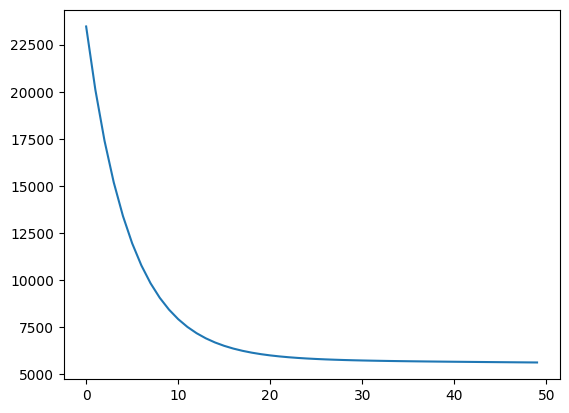

In [16]:
learning_rate = 0.05
epochs = 50
loss_history = {}

#initialize weight vector
weight_vector = np.ones(X_b.shape[1])
for epoch in range(epochs):
  #find gradient for the current set of weights
  grad = gradient(X_b,y_train,weight_vector)

  #update weights using the gradient descent algorithm
  weight_vector -= learning_rate * grad

  #find out the loss of the model
  loss = mse_loss(X_b,y_train,weight_vector)
  print(f"epoch - {epoch} : Loss -{loss}")

  loss_history[epoch] = loss

print(weight_vector)
plt.plot(loss_history.keys(),loss_history.values())

### Cross Validation

In [17]:
from typing import Tuple, Dict

In [18]:
X = load_diabetes().data
y = load_diabetes().target
cols = load_diabetes().feature_names

In [19]:
print(X.shape)
print(y.shape)
print(cols)

(442, 10)
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [20]:
def train_test_split(X:np.ndarray,
                     y:np.ndarray,
                     test_size:float=0.2,
                     random_state:int=42) -> tuple[np.ndarray,np.ndarray,np.ndarray, np.ndarray]:

  if(len(X)!=len(y)):
    raise ValueError("X and y must have the same length")
  if(test_size < 0 or test_size > 1):
    raise ValueError("test_size must be between 0 and 1")


  if random_state is not None:
    np.random.seed(random_state)

  n_samples = X.shape[0]
  n_test = int(test_size*n_samples)
  indices = np.random.permutation(n_samples)

  test_indices = indices[:n_test]
  train_indices = indices[n_test:]

  X_train = X[train_indices]
  y_train = y[train_indices]
  X_test = X[test_indices]
  y_test = y[test_indices]

  return X_train,y_train,X_test,y_test

X_train,y_train,X_test,y_test = train_test_split(X,y)
print(len(X_train))
print(len(X_test))

354
88


In [21]:
def generate_folds(X,k,shuffle=False):
  data_indices = np.arange(len(X)) # [0..n] np array -> can be shuffled and split easily

  if shuffle:
    data_indices = np.random.permutation(data_indices)

  folds = np.array_split(data_indices,k)
  return folds

def add_bias(X):
    n_samples = X.shape[0]
    return np.hstack((np.ones((n_samples, 1)), X))

def mse_loss(X_b,y,w):
  Y_hat = X_b @ w
  return np.mean((y-Y_hat)**2)

def gradient(X_b,y,w):
    n = len(y)
    return -(2 / n) * X_b.T @ (y - X_b @ w)

def cross_validation(X,y,folds):
  k = len(folds)
  for i in range(k):
    val_idx = folds[i]
    mask = np.ones(len(X),dtype=bool)
    mask[val_idx] = False
    train_idx = np.where(mask)[0] # returns a tuple (indices,) and extract the first element

    X_val = X[val_idx]
    y_val = y[val_idx]

    X_train = X[train_idx]
    y_train = y[train_idx]

    yield X_train,y_train,X_val,y_val


epoch: 0, loss: 25383.569753942727
epoch: 1, loss: 19533.23883492655
epoch: 2, loss: 15682.204557792309
epoch: 3, loss: 13131.500679053092
epoch: 4, loss: 11429.621833445197
epoch: 5, loss: 10284.273271669745
epoch: 6, loss: 9505.723206827915
epoch: 7, loss: 8970.41436272332
epoch: 8, loss: 8597.568243166606
epoch: 9, loss: 8334.126208240623
epoch: 10, loss: 8145.043276491411
epoch: 11, loss: 8007.021403014584
epoch: 12, loss: 7904.455002512152
epoch: 13, loss: 7826.801088950284
epoch: 14, loss: 7766.868189599935
epoch: 0, loss: 22502.005802417523
epoch: 1, loss: 16718.99488855001
epoch: 2, loss: 12926.259986367044
epoch: 3, loss: 10425.119150804807
epoch: 4, loss: 8764.857978341734
epoch: 5, loss: 7654.17176512053
epoch: 6, loss: 6904.346739295465
epoch: 7, loss: 6392.782537229214
epoch: 8, loss: 6039.555703437348
epoch: 9, loss: 5792.347573035761
epoch: 10, loss: 5616.739877292267
epoch: 11, loss: 5489.957317426057
epoch: 12, loss: 5396.825505607629
epoch: 13, loss: 5327.154191744436

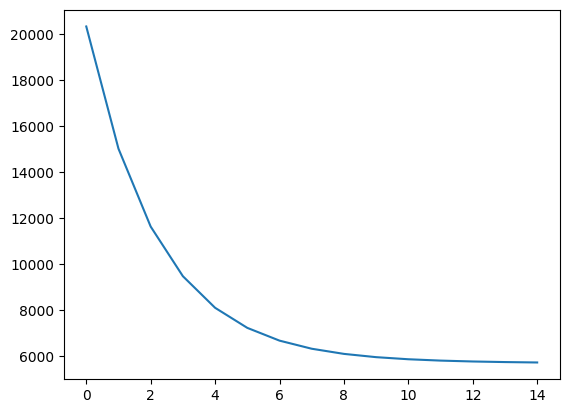

In [22]:
#main loop
k=10
learning_rate = 0.1
epochs = 15
weight_vector = np.ones(X_b.shape[1])

folds = generate_folds(X_train, k=5, shuffle=True)

fold_loss = {}
for i,(X_train,y_train,X_val,y_val) in enumerate(cross_validation(X_train,y_train,folds)):
  X_train_b = add_bias(X_train)
  X_val_b = add_bias(X_val)
  weight_vector = np.ones(X_train_b.shape[1])

  for epoch in range(epochs):
    grad = gradient(X_train_b,y_train,weight_vector)
    weight_vector -= learning_rate * grad
    val_loss = mse_loss(X_val_b,y_val,weight_vector)
    print(f'epoch: {epoch}, loss: {val_loss}')
    fold_loss[epoch] = val_loss

plt.plot(fold_loss.keys(),fold_loss.values())
print(weight_vector)

### Principal Component Analysis

In [23]:
#Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [33]:
X_train_std.shape

(284, 10)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x_pca = pca.fit_transform(X_train_std)

In [39]:
print("Components:",pca.components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance:", np.cumsum(pca.explained_variance_ratio_))

Components: [[ 0.22308378  0.16146851  0.30475507  0.25850596  0.35212655  0.35142658
  -0.26612698  0.42875763  0.38626999  0.3363118 ]
 [ 0.08132223 -0.39937428 -0.14655117 -0.03370538  0.54728484  0.40219927
   0.57045103 -0.14241123  0.0014652  -0.06550687]
 [ 0.41599406 -0.13925965  0.236683    0.55504989 -0.16056005 -0.36237524
   0.28284385 -0.36407876  0.12464542  0.24139315]
 [ 0.5009673   0.66794099 -0.45751954  0.08545928  0.06073049  0.11998507
   0.11691907 -0.04726047 -0.20030112 -0.11022893]
 [ 0.65526441 -0.34850669 -0.05932487 -0.4610979  -0.07606307 -0.150441
  -0.20611926  0.09812549  0.297838   -0.25258981]
 [-0.07471141 -0.01787518 -0.46646894 -0.30860596 -0.01828498 -0.16586924
   0.07446412 -0.03525872  0.20655615  0.77715333]
 [-0.27201471  0.02418737 -0.44254486  0.33924387  0.09773423 -0.2383555
   0.01335246  0.08514721  0.63474731 -0.37120453]
 [-0.09511829  0.47434228  0.44990333 -0.43947082  0.13154841 -0.18102981
   0.38263337 -0.17544599  0.36954414 -0.0

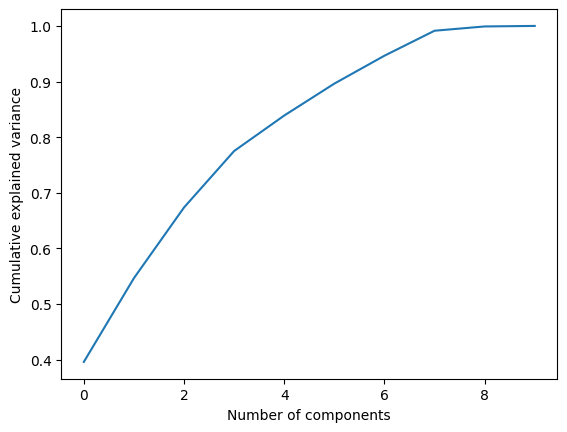

In [38]:
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [40]:
pca2d = PCA(n_components=2)
x_pca2d = pca2d.fit_transform(X_train_std)
x_pca2d.shape

(284, 2)

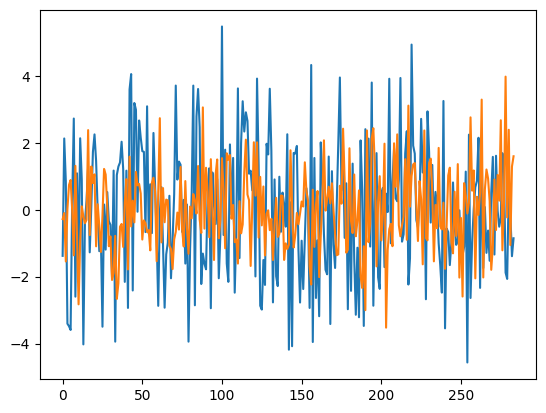

In [41]:
plt.plot(x_pca2d)

### Analysis

Closed Form Solution - [ 150.88647755  -11.61497375 -268.29146279  559.69376371  322.53768282
 -795.60655188  529.01812587   -5.01124071   83.45285492  745.74283664
   66.85271858]


Gradient Descent Solution - [131.98416514   2.36476678   1.15594451   5.80977315   4.33169799
   2.66622582   2.45844696  -2.15647581   4.5045422    5.15368472
   4.09745983]

Cross Validation Solution - [154.03281296   4.00899469   0.84599809  11.08279141   8.59168515
   2.6785314    2.36203517  -4.64221831   6.98161035   8.49890665
   7.24937791]

# Data Analysis

### Feature–Target Linearity Diagnostics

This visualization assesses the **linearity assumption** of linear regression by plotting each feature against the target variable with an overlaid linear fit.

#### Method
- Each subplot displays one feature versus the target.
- A scatter plot shows the raw relationship.
- A fitted linear regression line highlights the linear trend.

#### Interpretation
- **Approximately straight trend** → Linear relationship is plausible.
- **Clear curvature** → Indicates non-linearity; consider transformations or polynomial terms.
- **Flat or noisy pattern** → Feature may have weak explanatory power.
- **Uneven spread of points** → May suggest heteroscedasticity.

#### Purpose
These plots provide a **feature-level diagnostic** to identify non-linear relationships before or during model specification and complement residual-based diagnostics.


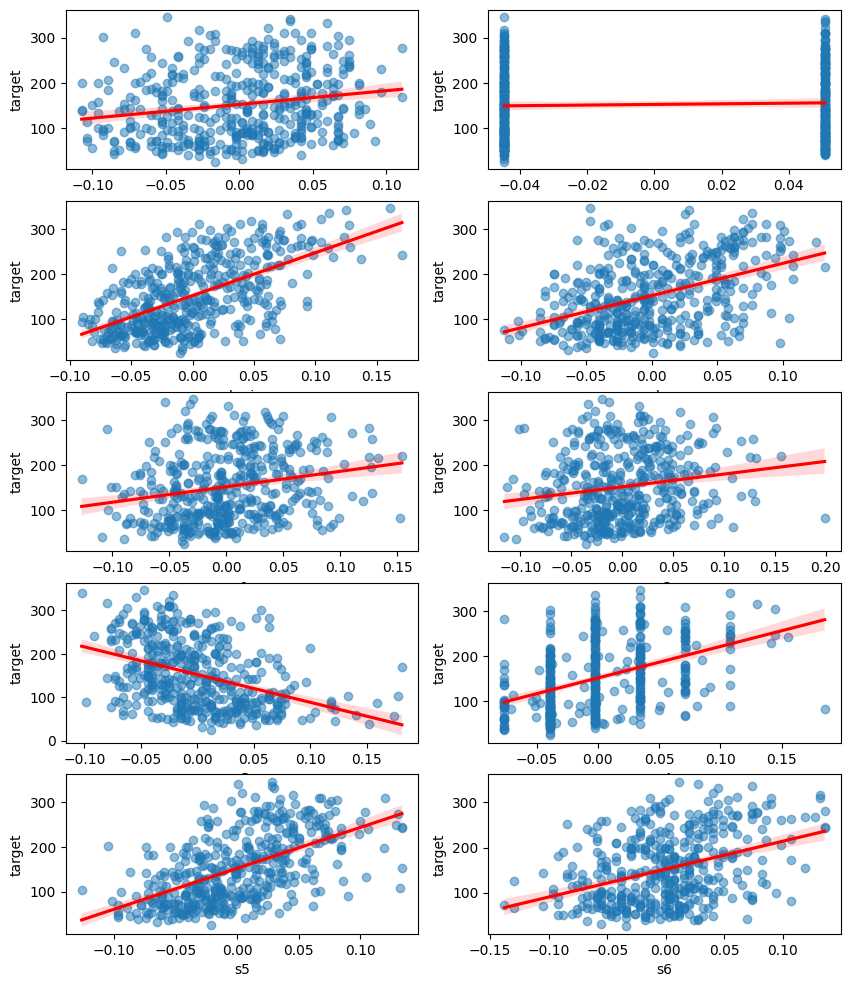

In [24]:
#for each feature, plot feature vs target to check for linearity
df = pd.DataFrame(X,columns=cols)
df['target'] = y

fig, axes = plt.subplots(5, 2, figsize=(10, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
  plt.subplot(5,2,i+1)
  sns.regplot(x=df[col],y=df['target'],ax=axes[i],scatter_kws={'alpha':0.5},line_kws={'color':'red'})

plt.show()


### Residual Diagnostics: Linearity and Homoscedasticity

This code fits a linear regression model and evaluates key assumptions using a **residuals vs. predicted values** plot.

- **Linearity**  
  Residuals should be randomly scattered around zero with no systematic pattern. Curvature or structure suggests non-linear relationships or missing terms.

- **Homoscedasticity**  
  The spread of residuals should remain approximately constant across all predicted values. A funnel or cone shape indicates heteroscedasticity.

**Desired outcome:**  
A horizontal band of points centered at zero with uniform spread across the x-axis.

This plot serves as an initial diagnostic; additional feature-level residual plots and formal statistical tests may be used for confirmation.


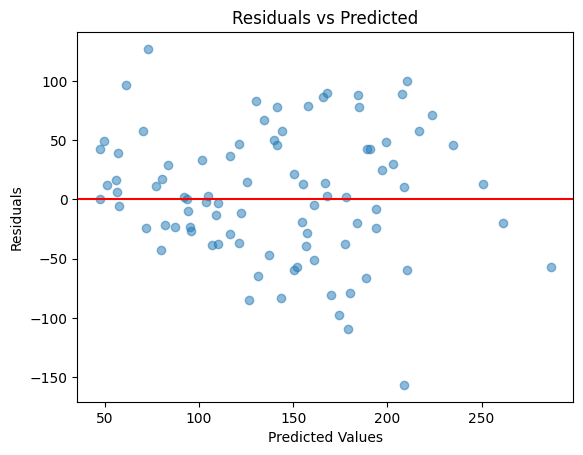

In [25]:
#check residual plots for linearity, homoscedascity
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


### Statistical Testing

#### Ramsey RESET Test

**Purpose**  
Tests whether non-linear combinations of the fitted values add explanatory power to the model.

**Hypotheses**  
- **H₀**: The model is correctly specified (linear)
- **H₁**: The model is misspecified (non-linear terms are missing)

**Interpretation**  
- **p-value < 0.05** → Evidence of non-linearity  
- **p-value ≥ 0.05** → Linearity assumption is plausible


In [26]:
#Ramsey Reset
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset

X_ = sm.add_constant(X_train)
model = sm.OLS(y_train, X_).fit()

reset = linear_reset(model, power=2, use_f=True)
print(reset)


<F test: F=3.6515654341921104, p=0.057067688299600926, df_denom=272, df_num=1>



#### Breusch–Pagan Test
**Purpose:**  
Tests whether residual variance depends on the predictors.

**Hypotheses:**  
- **H₀:** Residuals are homoscedastic  
- **H₁:** Residuals are heteroscedastic

**Decision Rule:**  
- *p-value < 0.05* → Evidence of heteroscedasticity  
- *p-value ≥ 0.05* → Homoscedasticity plausible


In [27]:
from statsmodels.stats.diagnostic import het_breuschpagan

X_ = sm.add_constant(X_train)
model = sm.OLS(y_train, X_).fit()

bp_test = het_breuschpagan(model.resid, model.model.exog)

print(bp_test)

(np.float64(16.353367906561765), np.float64(0.08995382684141529), np.float64(1.6680461859623796), np.float64(0.08807195750281586))


In [28]:

labels = ['LM Statistic', 'LM p-value', 'F-Statistic', 'F p-value']
bp_results = dict(zip(labels, bp_test))
print(bp_results)

{'LM Statistic': np.float64(16.353367906561765), 'LM p-value': np.float64(0.08995382684141529), 'F-Statistic': np.float64(1.6680461859623796), 'F p-value': np.float64(0.08807195750281586)}


#### Shapiro–Wilk Test
**Purpose:**  
Tests whether residuals follow a normal distribution.

**Hypotheses:**  
- **H₀:** Residuals are normally distributed  
- **H₁:** Residuals are not normally distributed

**Decision Rule:**  
- *p-value < 0.05* → Normality violated  


In [29]:
from scipy.stats import shapiro
X_ = sm.add_constant(X_train)
model = sm.OLS(y_train, X_).fit()
residuals = model.resid
stat, p_value = shapiro(residuals)

print(f"SW Statistic: {stat:.4f}, p-value: {p_value:.4f}")

SW Statistic: 0.9958, p-value: 0.6431



#### Variance Inflation Factor (VIF)
**Purpose:**  
Measures how strongly a predictor is linearly related to other predictors.

**Rule of Thumb:**  
- VIF > 5 → Moderate multicollinearity  
- VIF > 10 → Severe multicollinearity



In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
dfX = pd.DataFrame(X,columns=cols)
X_ = sm.add_constant(dfX)

vif_data = pd.DataFrame()
vif_data['feature'] = X_.columns
vif_data['VIF'] = [variance_inflation_factor(X_.values, i)
                   for i in range(X_.shape[1])]

print(vif_data)

   feature        VIF
0    const   1.000000
1      age   1.217307
2      sex   1.278071
3      bmi   1.509437
4       bp   1.459428
5       s1  59.202510
6       s2  39.193370
7       s3  15.402156
8       s4   8.890986
9       s5  10.075967
10      s6   1.484623
